# classification de texte
- labelliser données non structurées
- analyse de sentiment
- etiquetage de sujets
- detection de langue
- detection d'intention
- MKT : voix du client, surveillance de marque etc...

# annotation 
- manuelle
- automatique

## annotation automatique
- à base de règle
- apprentissage automatique

## apprentissage automatique
- naive bayes
- support vector machine
- deep learning

## transformation des mots
- representation numérique sous formes de vecteures
- sacs de mots
- word2vec
- par extension doc2vec, item2vec

# apprentissage automatique profond
- RNN (réseaux à mémoire)
- LSTM (bidirectionnal LSTM)
- ELMo (embeddings from Langage Models)
- CNN 
- Attention Model (Transformer Architecture)
- Transfer Learning (ULMFit Fast.ai)
- BERT : Bidirectional Encoder Representations from Transformers


# Transformation des textes
- clean Text
- tokenization
- construction du dictionnaire
- vectorisation

## Sacs de Mots

In [0]:
import re
import numpy

In [0]:
def word_extraction(sentence):    
    ignore = ['a', "the", "is"]
    words = re.sub("[^\w]", " ",  sentence).split()
    cleaned_text = [w.lower() for w in words if w not in ignore]
    return cleaned_text

In [0]:
import nltk
nltk.download("popular")

from nltk.corpus import stopwords 
set(stopwords.words('english'))

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [0]:
def tokenize(sentences):    
    words = []
    for sentence in sentences:
      w = word_extraction(sentence)
      words.extend(w)
    words = sorted(list(set(words)))
    return words

In [0]:
def generate_bow(allsentences):
  vocab = tokenize(allsentences)
  
  print("Word List for Document \n{0} \n".format(vocab));
  
  for sentence in allsentences:
      words = word_extraction(sentence)
      
      bag_vector = numpy.zeros(len(vocab))
      for w in words:
          for i,word in enumerate(vocab):
              if word == w:
                  bag_vector[i] += 1
      print("{0}\n{1}\n".format(sentence,numpy.array(bag_vector)))

In [0]:
allsentences = ["Joe waited for the train train", 
                "The train was late", 
                "Mary and Samantha took the bus",
                "I looked for Mary and Samantha at the bus station",
                "Mary and Samantha arrived at the bus station early but waited until noon for the bus"]

In [0]:
generate_bow(allsentences)

Word List for Document 
['and', 'arrived', 'at', 'bus', 'but', 'early', 'for', 'i', 'joe', 'late', 'looked', 'mary', 'noon', 'samantha', 'station', 'the', 'took', 'train', 'until', 'waited', 'was'] 

Joe waited for the train train
[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1. 0.]

The train was late
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]

Mary and Samantha took the bus
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]

I looked for Mary and Samantha at the bus station
[1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]

Mary and Samantha arrived at the bus station early but waited until noon for the bus
[1. 1. 1. 2. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.]



In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(allsentences)
print(X.toarray())

[[0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 2 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0]
 [1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0]
 [1 1 1 2 1 1 1 0 0 0 1 1 1 1 2 0 0 1 1 0]]


## Plongements de Mots (word embeddings, word2vec)
![Texte alternatif…](https://lh4.googleusercontent.com/u3CG-wlVB5QyyRrg0_26HgCELgQLTAS6SYzygiPH7SeRQy-2B7dpZyLjX4l8Izy_XIoTPH6gvAPBNDqmx9vw8x5hYlYT9KNjFSSq5C1jfgpHyIUBEPr_mS7A9sDBHgZYGufB-PaU)

- CBOW
- skipgram
![Texte alternatif…](https://i.imgur.com/vNYiUZi.jpg)
- gloVe
- FastText

In [0]:
import gensim

In [0]:
#word_extraction(allsentences[0])
splitted_sentences = list(map(word_extraction, allsentences))
print(splitted_sentences)

[['joe', 'waited', 'for', 'train', 'train'], ['the', 'train', 'was', 'late'], ['mary', 'and', 'samantha', 'took', 'bus'], ['i', 'looked', 'for', 'mary', 'and', 'samantha', 'at', 'bus', 'station'], ['mary', 'and', 'samantha', 'arrived', 'at', 'bus', 'station', 'early', 'but', 'waited', 'until', 'noon', 'for', 'bus']]


In [0]:
model = gensim.models.Word2Vec(min_count=1)  # an empty model, no training
model.build_vocab(splitted_sentences)                 # can be a non-repeatable, 1-pass generator     
model.train(splitted_sentences, total_examples=new_model.corpus_count, epochs=new_model.iter)


# equivalent to 
# model = gensim.models.Word2Vec(splitted_sentences, min_count=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(25, 185)

In [0]:
print(model)
print(model.wv.vocab)

Word2Vec(vocab=21, size=100, alpha=0.025)
{'joe': <gensim.models.keyedvectors.Vocab object at 0x7fc2766b11d0>, 'waited': <gensim.models.keyedvectors.Vocab object at 0x7fc2766b1710>, 'for': <gensim.models.keyedvectors.Vocab object at 0x7fc2766b1128>, 'train': <gensim.models.keyedvectors.Vocab object at 0x7fc2766b1e10>, 'the': <gensim.models.keyedvectors.Vocab object at 0x7fc2766b1dd8>, 'was': <gensim.models.keyedvectors.Vocab object at 0x7fc2766b1780>, 'late': <gensim.models.keyedvectors.Vocab object at 0x7fc2766b13c8>, 'mary': <gensim.models.keyedvectors.Vocab object at 0x7fc2766b15f8>, 'and': <gensim.models.keyedvectors.Vocab object at 0x7fc2766b1208>, 'samantha': <gensim.models.keyedvectors.Vocab object at 0x7fc2766b1320>, 'took': <gensim.models.keyedvectors.Vocab object at 0x7fc2766b1b70>, 'bus': <gensim.models.keyedvectors.Vocab object at 0x7fc2766b1b38>, 'i': <gensim.models.keyedvectors.Vocab object at 0x7fc2766b1a90>, 'looked': <gensim.models.keyedvectors.Vocab object at 0x7fc276

In [0]:
model['samantha']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-4.7656167e-03, -8.8466331e-04, -1.4730995e-03, -3.5601894e-03,
        3.1270806e-03,  8.4269041e-04,  1.6370642e-03, -4.3469188e-03,
        4.8332214e-03, -2.5110824e-03,  5.5417040e-04,  2.5224495e-03,
        3.0295111e-03,  1.0866605e-03,  2.2785566e-03,  5.4288137e-04,
       -4.7782795e-03,  2.7947119e-03, -3.0777738e-03,  4.8808539e-03,
        1.5348179e-03,  1.3826316e-03,  1.7316926e-03, -3.4299132e-03,
       -2.3213443e-03,  4.7536305e-04, -9.1163085e-05,  4.8450409e-03,
       -1.5521178e-03,  1.2120788e-04, -2.0122346e-03,  6.7030924e-05,
       -1.4195393e-03,  2.5640789e-03,  4.5928550e-03,  3.9391505e-04,
       -2.2117994e-03,  8.7065942e-04,  1.1817181e-03,  1.5786480e-03,
       -4.1620880e-03,  4.9237371e-04,  1.5251897e-04, -1.4095642e-03,
        3.3384045e-03,  3.5702097e-03, -1.1150773e-03, -2.5228648e-03,
       -1.6659044e-03, -3.3172175e-05,  1.5816427e-03,  4.1861408e-03,
        1.9112240e-03, -4.4220639e-03, -3.3634126e-03, -2.1392049e-03,
      

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



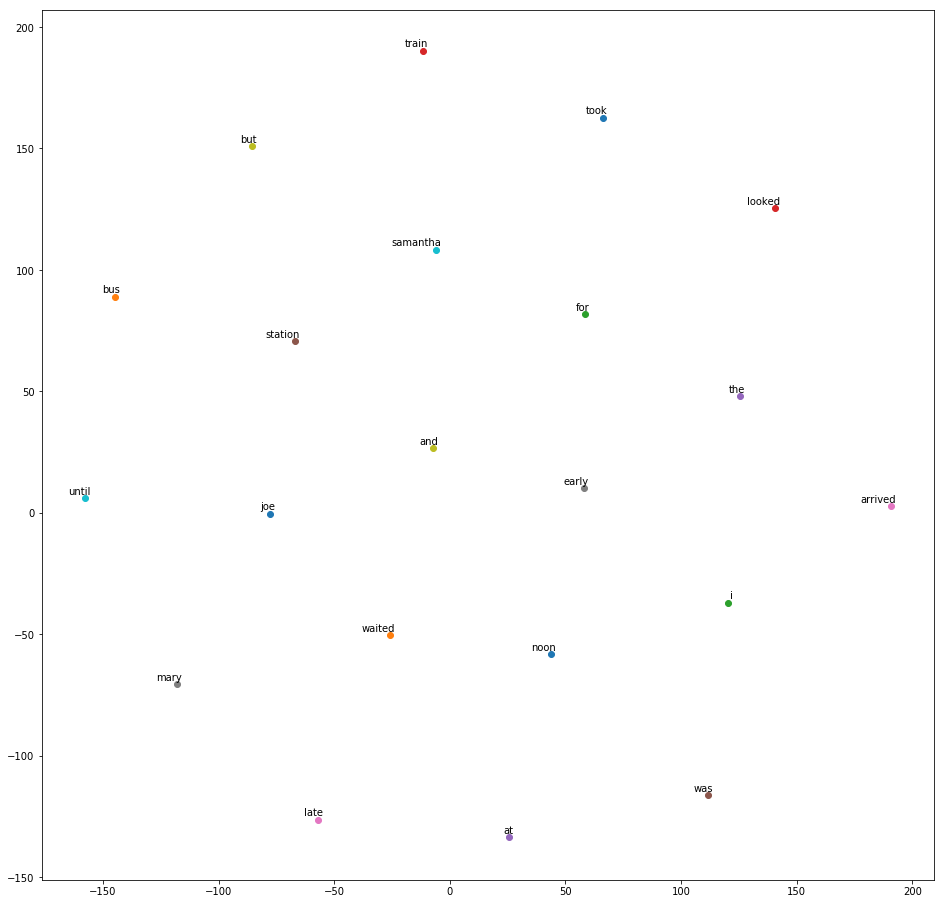

In [0]:
tsne_plot(model)

[gensim word2vec](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/word2vec.ipynb)